In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<center><b><h1>Collecting Data</h1></b></center>

In [46]:
df = pd.read_csv('heart.csv')

In [47]:
df.head()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<center><b><h1>Preprocessing Data</h1></b></center>

In [48]:
df['Gender'].replace(['M','F'],[0,1],inplace=True)
df['ChestPainType'].replace(['TA','ATA','NAP','ASY'],[0,1,2,3],inplace=True)
df['RestingECG'].replace(['Normal','ST','LVH'],[0,1,2],inplace=True)
df['ExerciseAngina'].replace(['N','Y'],[0,1],inplace=True)
df['ST_Slope'].replace(['Up','Flat','Down'],[0,1,2],inplace=True)

In [49]:
df

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1.2,1,1
914,68,0,3,144,193,1,0,141,0,3.4,1,1
915,57,0,3,130,131,0,0,115,1,1.2,1,1
916,57,1,1,130,236,0,2,174,0,0.0,1,1


<center><b><h1>EDA - Exploratory Data Analysis</h1></b></center>

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

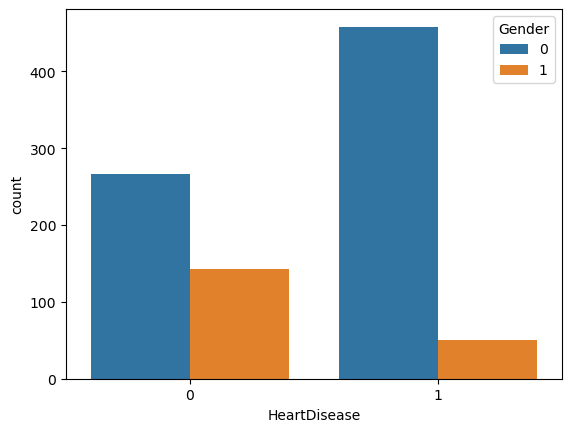

In [51]:
sns.countplot(data=df,x='HeartDisease',hue='Gender')

In [52]:
df.corr()

,Age,Gender,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,0.165896,0.254399,-0.095282,0.198039,0.213152,-0.382045,0.215793,0.258612,0.268264,0.282039
Gender,-0.055750,1.000000,-0.168254,-0.005133,0.200092,-0.120076,0.018343,0.189186,-0.190664,-0.105734,-0.150693,-0.305445
ChestPainType,0.165896,-0.168254,1.000000,0.022168,-0.136139,0.116703,0.031383,-0.343654,0.416625,0.245027,0.317480,0.471354
RestingBP,0.254399,-0.005133,0.022168,1.000000,0.100893,0.070193,0.097661,-0.112135,0.155101,0.164803,0.075162,0.107589
Cholesterol,-0.095282,0.200092,-0.136139,0.100893,1.000000,-0.260974,0.112095,0.235792,-0.034166,0.050148,-0.111471,-0.232741
FastingBS,0.198039,-0.120076,0.116703,0.070193,-0.260974,1.000000,0.050707,-0.131438,0.060451,0.052698,0.175774,0.267291
RestingECG,0.213152,0.018343,0.031383,0.097661,0.112095,0.050707,1.000000,0.048552,0.036119,0.114428,0.078807,0.061011
MaxHR,-0.382045,0.189186,-0.343654,-0.112135,0.235792,-0.131438,0.048552,1.000000,-0.370425,-0.160691,-0.343419,-0.400421
ExerciseAngina,0.215793,-0.190664,0.416625,0.155101,-0.034166,0.060451,0.036119,-0.370425,1.000000,0.408752,0.428706,0.494282
Oldpeak,0.258612,-0.105734,0.245027,0.164803,0.050148,0.052698,0.114428,-0.160691,0.408752,1.000000,0.501921,0.403951


<AxesSubplot:>

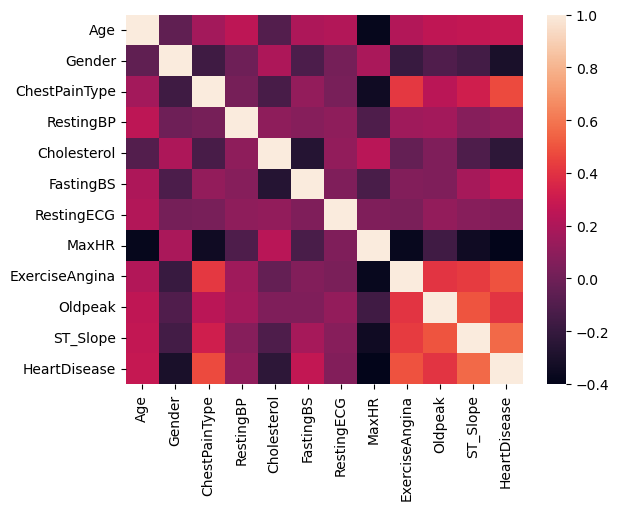

In [53]:
sns.heatmap(df.corr())

<center><b><h1>Cleaning Data</h1></b></center>

In [54]:
df.isna().sum()

Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### missing data not found and no need to removing outliers for this prediction

In [55]:
def find_outliers(data, col):
    quart1 = data[col].quantile(0.25)
    quart3 = data[col].quantile(0.75)
    IQR = quart3 - quart1 #Inter-quartile range
    low_val = quart1 - 1.5*IQR
    high_val = quart3 + 1.5*IQR
    data = data.loc[(data[col] < low_val) | (data[col] > high_val)]
    return data

In [56]:
print("Age" ,len(find_outliers(df,"Age")), " outliers" )
print("Gender" ,len(find_outliers(df,"Gender")), " outliers" )
print("ChestPainType" ,len(find_outliers(df,"ChestPainType")), " outliers" )
print("RestingBP" ,len(find_outliers(df,"RestingBP")), " outliers" )
print("Cholesterol" ,len(find_outliers(df,"Cholesterol")), " outliers" )
print("FastingBS" ,len(find_outliers(df,"FastingBS")), " outliers" )
print("RestingECG" ,len(find_outliers(df,"RestingECG")), " outliers" )
print("MaxHR" ,len(find_outliers(df,"MaxHR")), " outliers" )
print("ExerciseAngina" ,len(find_outliers(df,"ExerciseAngina")), " outliers" )
print("Oldpeak" ,len(find_outliers(df,"Oldpeak")), " outliers" )
print("ST_Slope" ,len(find_outliers(df,"ST_Slope")), " outliers" )

Age 0  outliers
Gender 193  outliers
ChestPainType 46  outliers
RestingBP 28  outliers
Cholesterol 183  outliers
FastingBS 214  outliers
RestingECG 0  outliers
MaxHR 2  outliers
ExerciseAngina 0  outliers
Oldpeak 16  outliers
ST_Slope 0  outliers


<center><b><h1>Spliltting Dataset</h1></b></center>

In [57]:
x = df.drop('HeartDisease',axis=1)
y =  df[['HeartDisease']]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [59]:
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

x_train shape :  (642, 11)
y_train shape :  (642, 1)
x_test shape :  (276, 11)
y_test shape :  (276, 1)


<center><b><h1>Choosing a Model </h1></b></center>
    

### we will be using linear regression model

<center><b><h1>Training the Model </h1></b></center>

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(x_train,y_train)

LinearRegression()

In [62]:
print(lr.intercept_)

[0.04036609]


In [63]:
print(lr.coef_)

[[ 0.00265557 -0.16398325  0.1116549   0.00084365 -0.0004857   0.1416075
  -0.0008661  -0.00122041  0.17004547  0.05761804  0.22223918]]


<center><b><h1>Testing the Model </h1></b></center>

In [64]:
y_pred = lr.predict(x_test)

In [65]:
mean_squared_error(y_test,y_pred)

0.11677015071530938